# Image Classification

#### CNN model without dropout or data augmentation

In [1]:
# Import required packages to load dataset, create convnet model
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras import optimizers
from keras.utils.np_utils import to_categorical

In [2]:
# Compile model
model = models.Sequential()
model.add(layers.Conv2D(32,(4,4),input_shape = (32,32,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(4,4),input_shape = (32,32,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [3]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
Total params: 17,984
Trainable params: 17,984
Non-trainable params: 0
_________________________________________________________________


In [4]:
 # Add classifier and display model summary
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [5]:
# Load data set 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing
x_train = x_train/255
x_test = x_test/255

# One hot encode
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
# Create validation set
x_val = x_train[:1000]
partial_x = x_train[1000:]

y_val = y_train[:1000]
partial_y = y_train[1000:]

In [7]:
# Compile model
model.compile(optimizer='rmsprop', loss = 
              'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Fit model
history = model.fit(partial_x, 
                    partial_y, 
                    epochs = 10, validation_data=(x_val,y_val))

Epoch 1/10
1532/1532 [==============================] - 38s 24ms/step - loss: 1.5829 - accuracy: 0.4270 - val_loss: 1.2618 - val_accuracy: 0.5460
Epoch 2/10
1532/1532 [==============================] - 34s 22ms/step - loss: 1.2282 - accuracy: 0.5674 - val_loss: 1.7403 - val_accuracy: 0.4210
Epoch 3/10
1532/1532 [==============================] - 33s 22ms/step - loss: 1.0909 - accuracy: 0.6190 - val_loss: 1.2839 - val_accuracy: 0.5590
Epoch 4/10
1532/1532 [==============================] - 34s 22ms/step - loss: 0.9964 - accuracy: 0.6507 - val_loss: 1.1432 - val_accuracy: 0.6100
Epoch 5/10
1532/1532 [==============================] - 32s 21ms/step - loss: 0.9154 - accuracy: 0.6822 - val_loss: 1.0434 - val_accuracy: 0.6480
Epoch 6/10
1532/1532 [==============================] - 36s 23ms/step - loss: 0.8543 - accuracy: 0.7034 - val_loss: 1.0995 - val_accuracy: 0.6480
Epoch 7/10
1532/1532 [==============================] - 33s 21ms/step - loss: 0.8019 - accuracy: 0.7225 - val_loss: 1.1427 -

In [9]:
# Create history_dict to retrieve history object from model training
# Will be needed to plot loss and accuracy
history_dict = history.history

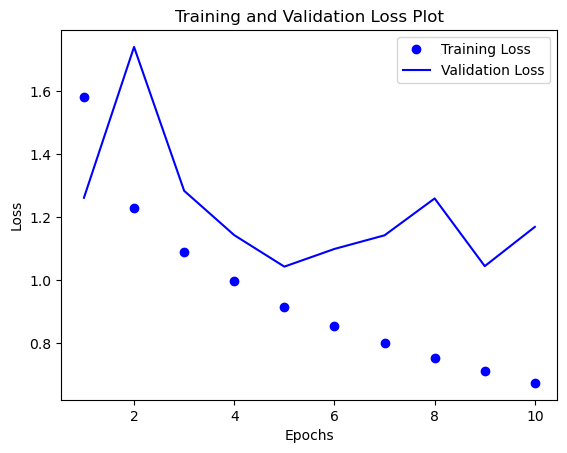

In [10]:
# Plot training and validation loss
acc = history_dict['accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

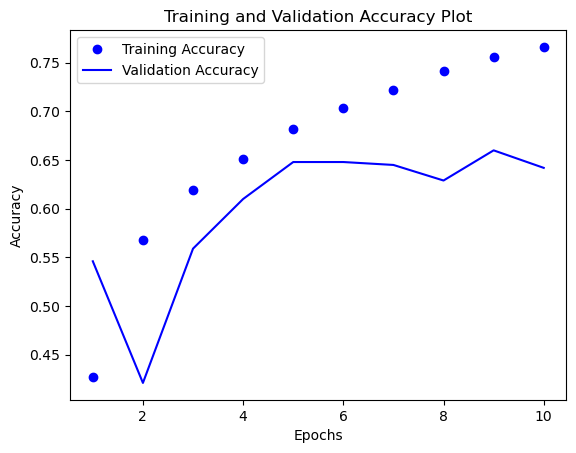

In [11]:
# Compare training and validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 8s 24ms/step - loss: 1.1313 - accuracy: 0.6437


0.6437000036239624

In [15]:
test_loss

1.1313070058822632

In [13]:
# Save model
model.save('cifar10.keras')

In [16]:
# Create predictions and save as text file
predictions = model.predict(x_test)

# Save predictions as csv
import pandas as pd
res = pd.DataFrame(predictions)
res.to_csv('cifar10-prediction-results.csv')

313/313 [==============================] - 5s 16ms/step


In [17]:
# Save model metrics as csv
model_history = pd.DataFrame(history_dict)
model_history.to_csv('cifar10.metrics.csv')

#### CNN Model after adding dropout layers and data augmentation

In [18]:
# Compile new model
model = models.Sequential()
model.add(layers.Conv2D(32,(4,4),input_shape = (32,32,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(4,4),input_shape = (32,32,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
Total params: 17,984
Trainable params: 17,984
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Add classifier and display model summary
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [20]:
# Summarize model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)              

In [21]:
# Compile model
model.compile(optimizer='rmsprop', loss = 
              'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Import packages for data augmentation
from keras.preprocessing.image import ImageDataGenerator

# Augmenting training set images
datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True,
                            shear_range=0.2)
batch_size = 32
train_gen = datagen.flow(x_train,y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

# Validate with test data
history = model.fit(train_gen,
                              steps_per_epoch = steps_per_epoch,
                              validation_data =(x_test, y_test),
                              epochs=50)

Epoch 1/50
1562/1562 [==============================] - 60s 37ms/step - loss: 1.6394 - accuracy: 0.4094 - val_loss: 1.3213 - val_accuracy: 0.5276
Epoch 2/50
1562/1562 [==============================] - 63s 41ms/step - loss: 1.3483 - accuracy: 0.5220 - val_loss: 1.1479 - val_accuracy: 0.5968
Epoch 3/50
1562/1562 [==============================] - 65s 42ms/step - loss: 1.2404 - accuracy: 0.5670 - val_loss: 1.1228 - val_accuracy: 0.6107
Epoch 4/50
1562/1562 [==============================] - 59s 38ms/step - loss: 1.1828 - accuracy: 0.5869 - val_loss: 1.0340 - val_accuracy: 0.6357
Epoch 5/50
1562/1562 [==============================] - 69s 44ms/step - loss: 1.1340 - accuracy: 0.6058 - val_loss: 1.0312 - val_accuracy: 0.6401
Epoch 6/50
1562/1562 [==============================] - 58s 37ms/step - loss: 1.1000 - accuracy: 0.6189 - val_loss: 1.0860 - val_accuracy: 0.6234
Epoch 7/50
1562/1562 [==============================] - 54s 34ms/step - loss: 1.0756 - accuracy: 0.6291 - val_loss: 0.9588 -

In [23]:
# Create history_dict to retrieve history object from model training
# Will be needed to plot loss and accuracy
history_dict2 = history.history

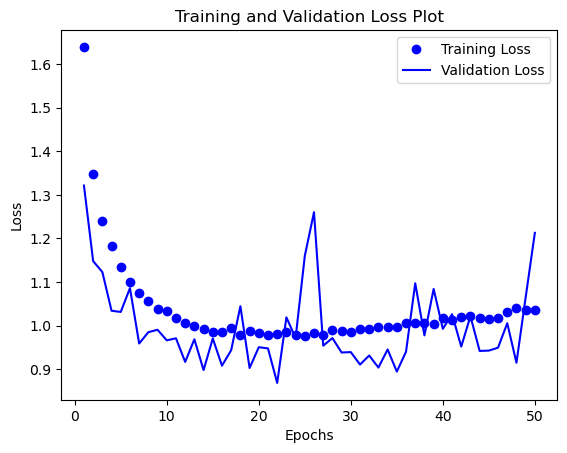

In [24]:
# Plot training and validation loss
acc = history_dict2['accuracy']
loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

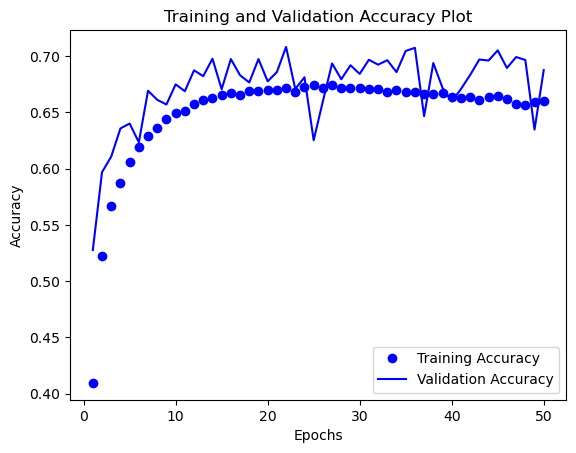

In [25]:
# Compare training and validation accuracy
plt.clf()
acc_values = history_dict2['accuracy']
val_acc_values = history_dict2['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
# Evaluate model, display test accuracy
test_loss2, test_acc2 = model.evaluate(x_test, y_test)
test_acc2

313/313 [==============================] - 3s 9ms/step - loss: 1.2128 - accuracy: 0.6876


0.6876000165939331

In [27]:
# Display test loss
test_loss2

1.2127776145935059

In [28]:
# Save model
model.save('cifar10-dropout-aug.keras')

In [29]:
# Create predictions and save as text file
predictions2 = model.predict(x_test)

# Save predictions as csv
import pandas as pd
res = pd.DataFrame(predictions2)
res.to_csv('cifar10-dropout-aug-prediction-results.csv')

313/313 [==============================] - 4s 13ms/step


In [30]:
# Save model metrics as csv
model_history2 = pd.DataFrame(history_dict2)
model_history2.to_csv('cifar10.metrics.csv')

As we can see with the above, with just one dropout layer and the data augmentation, we have seen an increase in model accuracy of $4$ percent.